In [1]:
#Import Libraries
#Import the important module

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
import pandas.util.testing as tm

<ipython-input-1-0c5e4667aa5f>:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "C:/Users/Lenovo/Desktop/New folder/Mtest.csv"
df = pd.read_csv(path)

In [4]:
df.shape

(153164, 2)

In [5]:
path = "C:/Users/Lenovo/Desktop/New folder/Mtrain.csv"
data = pd.read_csv(path)

In [6]:
data.shape

(159571, 8)

In [7]:
df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df.isnull().sum()

id              0
comment_text    0
dtype: int64

In [10]:
data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [13]:
data.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [14]:
df.columns

Index(['id', 'comment_text'], dtype='object')

In [15]:
data.id.unique()

array(['0000997932d777bf', '000103f0d9cfb60f', '000113f07ec002fd', ...,
       'ffee36eab5c267c9', 'fff125370e4aaaf3', 'fff46fc426af1f9a'],
      dtype=object)

In [16]:
df.id.unique()

array(['00001cee341fdb12', '0000247867823ef7', '00013b17ad220c46', ...,
       'fffda9e8d6fafa9e', 'fffe8f1340a79fc2', 'ffffce3fb183ee80'],
      dtype=object)

In [17]:
data.comment_text.unique()

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [18]:
df.comment_text.unique()

array(["Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,",
       '== From RfC == \n\n The title is fine as it is, IMO.',
       '" \n\n == Sources == \n\n * Zawe Ashton on Lapland —  /  "', ...,
       '" \n\n == Okinotorishima categories == \n\n I see your changes and agree this is ""more correct.""  I had gotten confused, but then found this: \n :... while acknowledging Japan\'s territorial rights to Okinotorishima itself ... \n However, is there a category for  \n :... did not acknowledge Japan\'s claim to an exclusive economic zone (EEZ) stemming from Okinotorishima. \n That is, is there a category for ""disputed EEZ""s?   "',
       '" \n\n == ""One of the founding n

In [19]:
data.malignant.unique()

array([0, 1], dtype=int64)

In [20]:
data.highly_malignant.unique()

array([0, 1], dtype=int64)

In [21]:
data.rude.unique()

array([0, 1], dtype=int64)

In [22]:
data.threat.unique()

array([0, 1], dtype=int64)

In [23]:
data.abuse.unique()

array([0, 1], dtype=int64)

In [24]:
data.loathe.unique()

array([0, 1], dtype=int64)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
no = data[data.malignant==0]
yes = data[data.malignant==1]
print(no)
print(yes)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  

In [27]:
yes.shape

(15294, 8)

In [28]:
no.shape

(144277, 8)

In [29]:
yes.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,15294.0,15294.000000,15294.000000,15294.000000,15294.000000,15294.000000
mean,1.0,0.104289,0.518242,0.029358,0.480188,0.085131
std,0.0,0.305645,0.499683,0.168813,0.499624,0.279086
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
no.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,144277.0,144277.0,144277.000000,144277.000000,144277.000000,144277.000000
mean,0.0,0.0,0.003625,0.000201,0.003694,0.000714
std,0.0,0.0,0.060099,0.014176,0.060668,0.026710
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,1.000000,1.000000,1.000000,1.000000


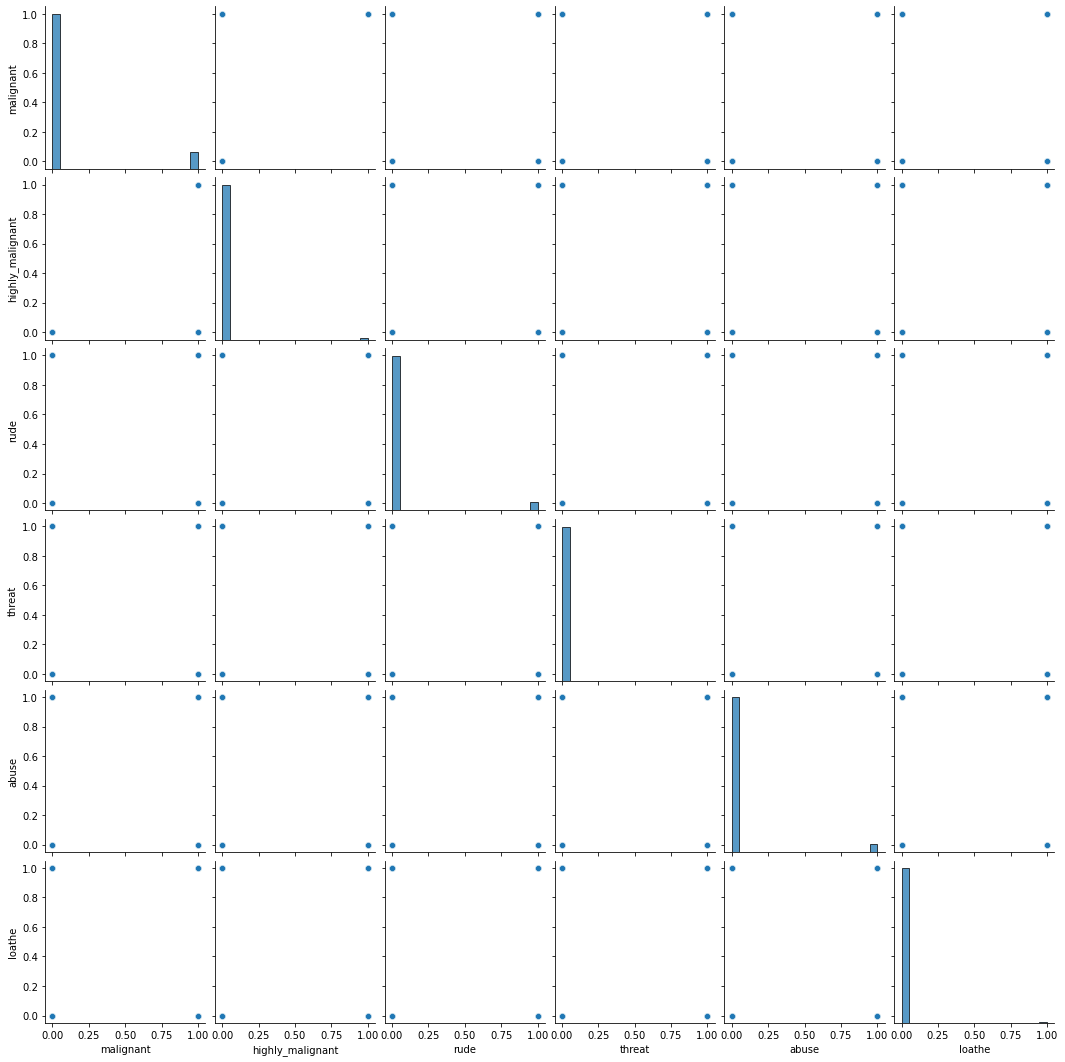

In [31]:
sns.pairplot(data)

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


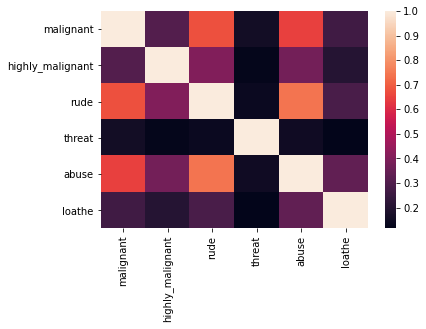

In [32]:
print(data.corr())
print(sns.heatmap(data.corr()))

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          0.086659          0.009038  0.044596  0.002527  0.041292   
highly_malignant   0.009038          0.009896  0.008978  0.000672  0.008098   
rude               0.044596          0.008978  0.050145  0.001728  0.035959   
threat             0.002527          0.000672  0.001728  0.002987  0.001776   
abuse              0.041292          0.008098  0.035959  0.001776  0.046927   
loathe             0.007316          0.001874  0.006001  0.000588  0.006835   

                    loathe  
malignant         0.007316  
highly_malignant  0.001874  
rude              0.006001  
threat            0.000588  
abuse             0.006835  
loathe            0.008727  
AxesSubplot(0.125,0.125;0.62x0.755)


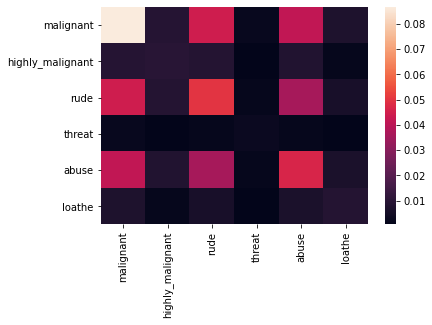

In [33]:
print(data.cov())
print(sns.heatmap(data.cov()))

In [34]:
nums = [34, 1, 0, -23, 12, -88]

print("Original numbers in the list: ",nums)

new_nums = list(filter(lambda x: x >0, nums))

print("Positive numbers in the said list: ",new_nums)

Original numbers in the list:  [34, 1, 0, -23, 12, -88]
Positive numbers in the said list:  [34, 1, 12]


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


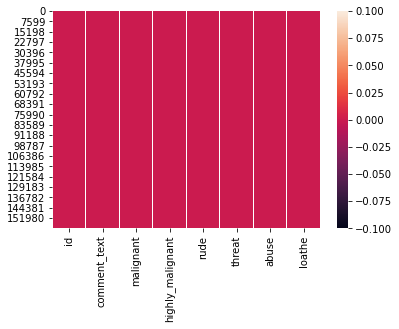

In [37]:
# checking null values
print(data.isnull().sum())
print(sns.heatmap(data.isnull()))

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


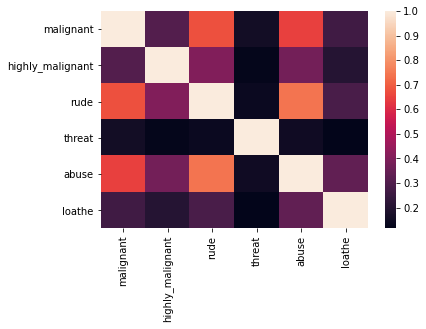

In [38]:
## checking correlation in dataset
print(data.corr())
print(sns.heatmap(data.corr()))

In [39]:
# checking the skewness for the features:
data.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


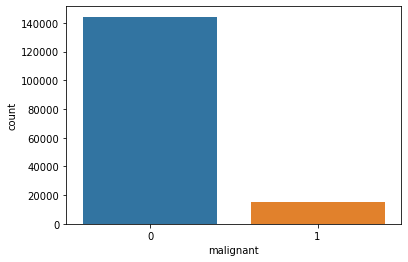

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


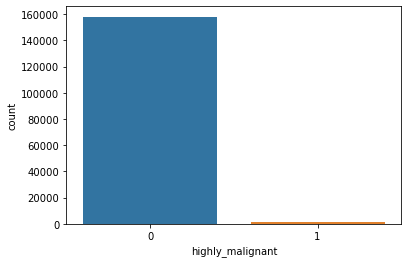

loathe


0    158166
1      1405
Name: loathe, dtype: int64


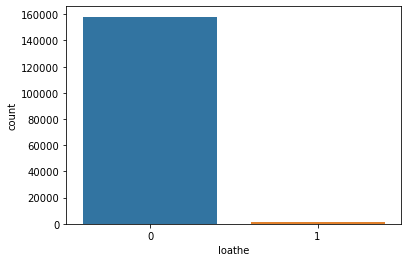

rude


0    151122
1      8449
Name: rude, dtype: int64


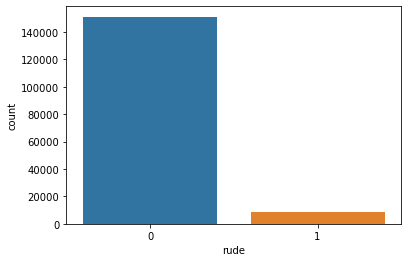

abuse


0    151694
1      7877
Name: abuse, dtype: int64


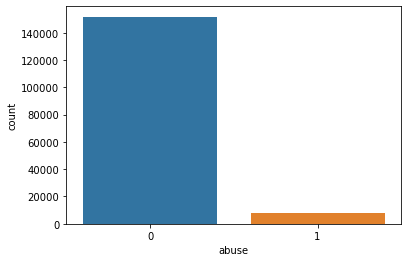

threat


0    159093
1       478
Name: threat, dtype: int64


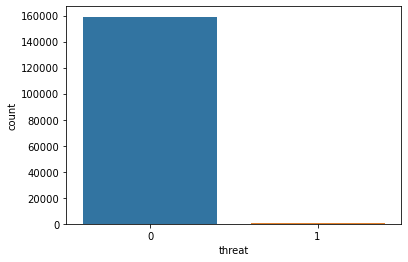

In [41]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(data[i].value_counts())
    sns.countplot(data[i])
    plt.show()

In [46]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [45]:
!! pip install nltk

['Requirement already satisfied: nltk in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (3.5)',
 'Requirement already satisfied: tqdm in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from nltk) (4.50.2)',
 'Requirement already satisfied: regex in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from nltk) (2020.10.15)',
 'Requirement already satisfied: joblib in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from nltk) (0.17.0)',
 'Requirement already satisfied: click in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from nltk) (7.1.2)']

In [49]:
pip install corpus

  Created wheel for corpus: filename=Corpus-0.4.2-py3-none-any.whl size=88800 sha256=e0b1947caac2755c89ac4c49090e27ef19142c021911caee2c70d8c8d2b07ce3
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\70\b6\bf\fa4851cb0902aafa9812d0b1c9aae6c7ae55f87827e23683bc
Successfully built corpus
Note: you may need to restart the kernel to use updated packages.


In [43]:
data['length'] = data['comment_text'].str.len()
data.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [54]:
# Convert all messages to lower case
data['comment_text'] = data['comment_text'].str.lower()

# Replace email addresses with 'email'
data['comment_text'] = data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
data['comment_text'] = data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['comment_text'] = data['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['comment_text'] = data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
data['comment_text'] = data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [55]:
data['clean_length'] = data.comment_text.str.len()
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [56]:
# Total length removal
print ('Origian Length', data.length.sum())
print ('Clean Length', data.clean_length.sum())

Origian Length 62893130
Clean Length 43537267


In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

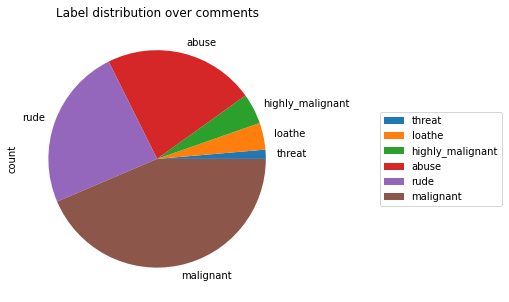

In [59]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = data[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [60]:
target_data = data[cols_target]

data['bad'] =data[cols_target].sum(axis =1)
print(data['bad'].value_counts())
data['bad'] = data['bad'] > 0 
data['bad'] = data['bad'].astype(int)
print(data['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


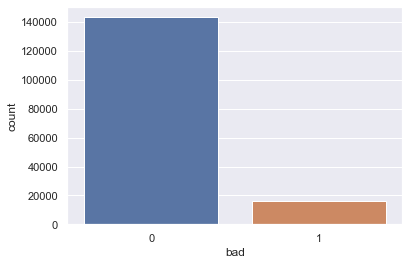

In [62]:
sns.set()
sns.countplot(x="bad" , data = data)
plt.show()

In [63]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(data['comment_text'])
x = features

In [64]:
data.shape

(159571, 11)

In [65]:
df.shape

(153164, 2)

In [66]:
y=data['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [67]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [68]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595520103134316
Test accuracy is 0.9552139037433155
[[42729   221]
 [ 1923  2999]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [69]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988092999937331
Test accuracy is 0.9390040106951871
[[41590  1360]
 [ 1560  3362]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.68      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [70]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988092999937331
Test accuracy is 0.9549423462566845
[[42410   540]
 [ 1617  3305]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



In [71]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9510738681635467
Test accuracy is 0.9489263034759359
[[42553   397]
 [ 2048  2874]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [72]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9223627785387515
Test accuracy is 0.917697192513369
[[42812   138]
 [ 3802  1120]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.23      0.36      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.61      0.66     47872
weighted avg       0.92      0.92      0.89     47872



In [74]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987913947304811
Test accuracy is 0.9550050133689839
cross validation score : 95.65397124932424
[[42422   528]
 [ 1626  3296]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.96      0.95     47872



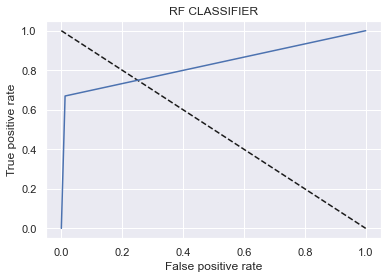

In [75]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [76]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0727 ± 0.0532,fuck
0.0424 ± 0.0484,fucking
0.0288 ± 0.0309,shit
0.0208 ± 0.0179,suck
0.0203 ± 0.0120,idiot
0.0185 ± 0.0161,stupid
0.0165 ± 0.0187,bitch
0.0165 ± 0.0135,asshole
0.0125 ± 0.0121,dick
0.0112 ± 0.0095,faggot


In [79]:
df_data =tf_vec.fit_transform(df['comment_text'])
df_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [80]:
prediction=RF.predict(df_data)
prediction

array([0, 0, 0, ..., 1, 0, 0])